In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.interpolate import griddata
import pandas as pd

BCIsensor_xy = np.genfromtxt('BCIsensor_xy.csv',delimiter=',')
feaSubEImg_1 = np.genfromtxt('feaSubEImg_1.csv',delimiter=',')
feaSubEImg_2 = np.genfromtxt('feaSubEImg_2.csv',delimiter=',')
feaSubEOvert_1 = np.genfromtxt('feaSubEOvert_1.csv',delimiter=',')
feaSubEOvert_2 = np.genfromtxt('feaSubEOvert_2.csv',delimiter=',')
print(feaSubEOvert_2.shape,feaSubEOvert_1.shape,feaSubEImg_1.shape,feaSubEImg_2.shape)

(204, 120) (204, 120) (204, 120) (204, 120)


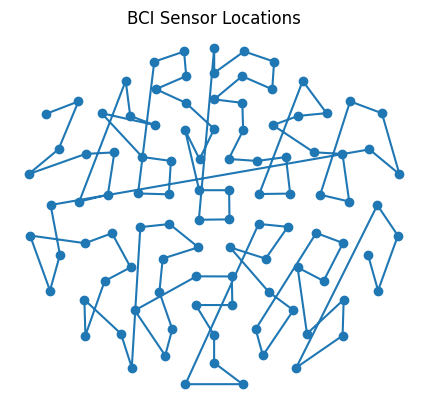

In [62]:
plt.plot(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.scatter(BCIsensor_xy[:,0],BCIsensor_xy[:,1])
plt.title("BCI Sensor Locations")
ax = plt.gca()
ax.set_aspect('equal')
plt.axis('off')
plt.show()

In [ ]:
def plotBrains(data_x, data_y, title, fname, dfunc):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    fig, ax = plt.subplots(11,11,figsize=(15,15))
    for i in range(120):
        ii = i // 11
        jj = i % 11
        d = dfunc(data_x,data_y)[i]
        grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
        c = ax[ii][jj].pcolor(grid)
        ax[ii][jj].axis('off')
    ax[10][10].axis('off')
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    fig.suptitle(title)
    plt.savefig(fname)
# transpose so they are (120, 102) each row is an observation
img_class_1_x = feaSubEImg_1[np.arange(0,feaSubEImg_1.shape[0],2)].T
img_class_1_y = feaSubEImg_1[np.arange(1,feaSubEImg_1.shape[0],2)].T
img_class_2_x = feaSubEImg_2[np.arange(0,feaSubEImg_2.shape[0],2)].T
img_class_2_y = feaSubEImg_2[np.arange(1,feaSubEImg_2.shape[0],2)].T

overt_class_1_x = feaSubEOvert_1[np.arange(0,feaSubEOvert_1.shape[0],2)].T
overt_class_1_y = feaSubEOvert_1[np.arange(1,feaSubEOvert_1.shape[0],2)].T
overt_class_2_x = feaSubEOvert_2[np.arange(0,feaSubEOvert_2.shape[0],2)].T
overt_class_2_y = feaSubEOvert_2[np.arange(1,feaSubEOvert_2.shape[0],2)].T

def addXY(d1,d2):
    return d1+d2

plotBrains(img_class_1_x,img_class_1_y,"img_class_1","./img_class_1.png",addXY)
plotBrains(img_class_2_x,img_class_2_y,"img_class_2","./img_class_2.png",addXY)
plotBrains(overt_class_1_x,overt_class_1_x,"overt_class_1","./overt_class_1.png",addXY)
plotBrains(overt_class_1_y,overt_class_1_y,"overt_class_2","./overt_class_2.png",addXY)

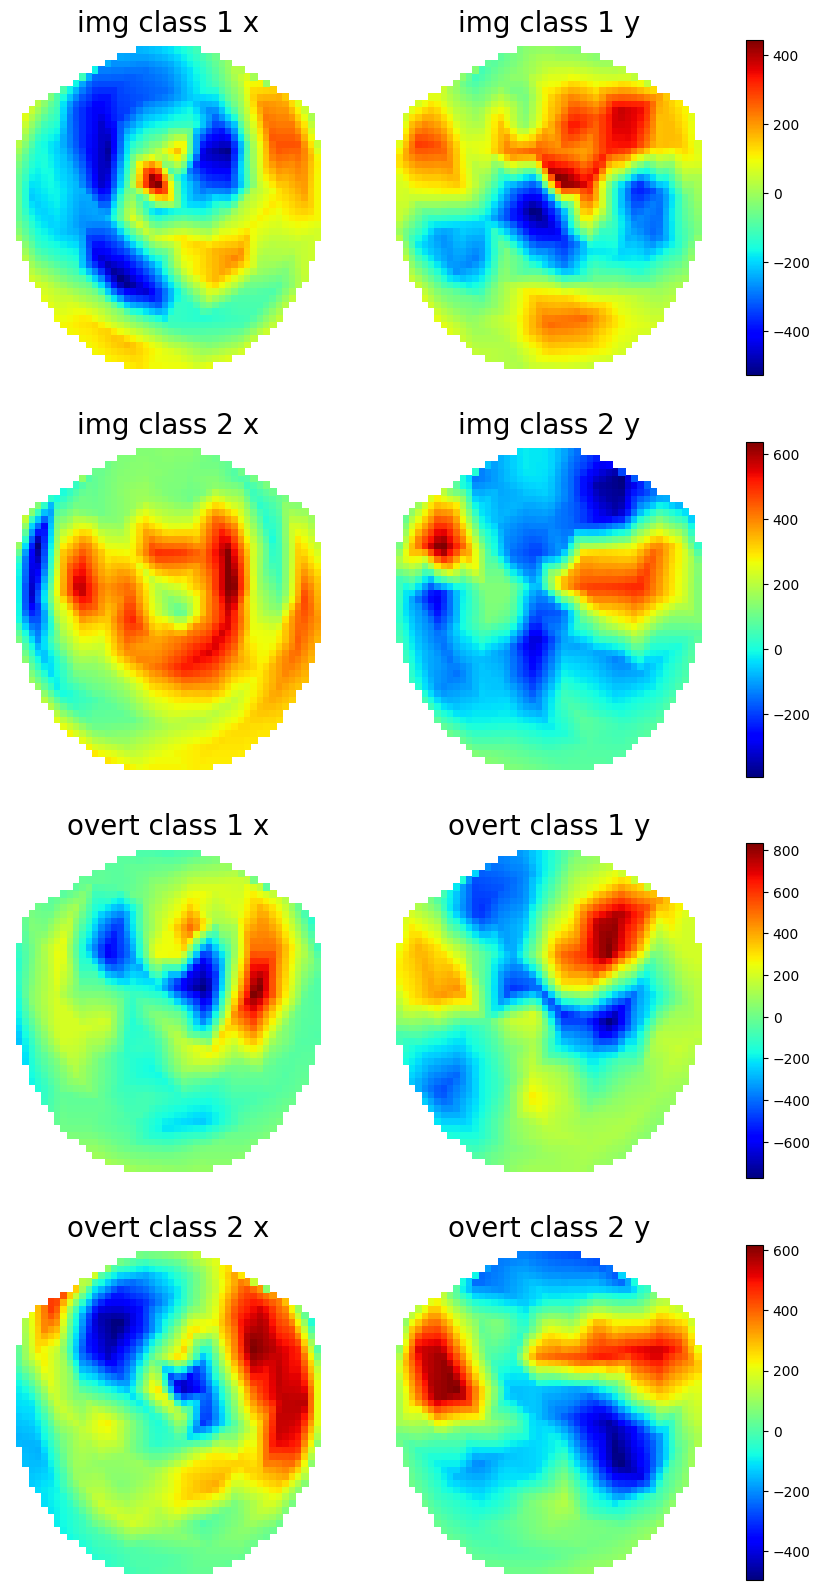

In [10]:
def func1(d1,d2):
    return d1

def func2(d1,d2):
    return d2

def plotDecisionBoundary(ax, data_x, data_y, title, fname, dfunc):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    d = dfunc(data_x,data_y)
    grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
    c = ax.pcolor(grid, cmap='jet')
    ax.axis('off')
    ax.set_title(title,fontsize=20)
    return c

def plotbrain(ax, datax, datay, title):
    plotDecisionBoundary(ax[0], datax,datay, f"{title} x","",func1)
    c=plotDecisionBoundary(ax[1], datax,datay,f"{title} y","",func2)
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')

i_c1_x = feaSubEImg_1[np.arange(0,feaSubEImg_1.shape[0],2)].T[0]
i_c1_y = feaSubEImg_1[np.arange(1,feaSubEImg_1.shape[0],2)].T[0]
i_c2_x = feaSubEImg_2[np.arange(0,feaSubEImg_2.shape[0],2)].T[0]
i_c2_y = feaSubEImg_2[np.arange(1,feaSubEImg_2.shape[0],2)].T[0]
o_c1_x = feaSubEOvert_1[np.arange(0,feaSubEOvert_1.shape[0],2)].T[0]
o_c1_y = feaSubEOvert_1[np.arange(1,feaSubEOvert_1.shape[0],2)].T[0]
o_c2_x = feaSubEOvert_2[np.arange(0,feaSubEOvert_2.shape[0],2)].T[0]
o_c2_y = feaSubEOvert_2[np.arange(1,feaSubEOvert_2.shape[0],2)].T[0]

fig, ax = plt.subplots(4,2,figsize=(10,20))
plotbrain(ax[0],i_c1_x, i_c1_y, "img class 1")
plotbrain(ax[1],i_c2_x, i_c2_y, "img class 2")
plotbrain(ax[2],o_c1_x, o_c1_y, "overt class 1")
plotbrain(ax[3],o_c2_x, o_c2_y, "overt class 2")
plt.show()


In [21]:
img_combined = np.ndarray((feaSubEImg_1.shape[1]+feaSubEImg_2.shape[1],feaSubEImg_1.shape[0]+1))
img_combined[:feaSubEImg_1.shape[1],:feaSubEImg_1.shape[0]] = feaSubEImg_1.T
img_combined[:feaSubEImg_1.shape[1],feaSubEImg_1.shape[0]] = 1
img_combined[feaSubEImg_1.shape[1]:,:feaSubEImg_2.shape[0]] = feaSubEImg_2.T
img_combined[feaSubEImg_1.shape[1]:,feaSubEImg_2.shape[0]] = 0

overt_combined = np.ndarray((feaSubEOvert_1.shape[1]+feaSubEOvert_2.shape[1],feaSubEOvert_1.shape[0]+1))
overt_combined[:feaSubEOvert_1.shape[1],:feaSubEOvert_1.shape[0]] = feaSubEOvert_1.T
overt_combined[:feaSubEOvert_1.shape[1],feaSubEOvert_1.shape[0]] = 1
overt_combined[feaSubEOvert_2.shape[1]:,:feaSubEOvert_1.shape[0]] = feaSubEOvert_2.T
overt_combined[feaSubEOvert_2.shape[1]:,feaSubEOvert_2.shape[0]] = 0
print(img_combined.shape)
print(feaSubEImg_1.T.shape)


(240, 205)
(120, 204)


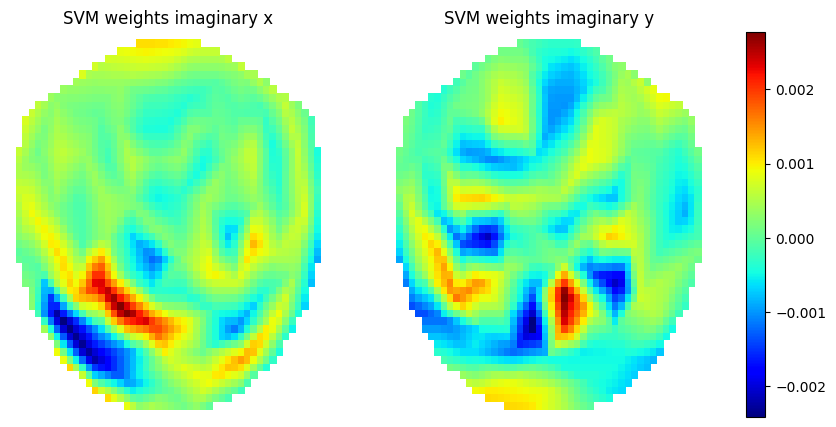

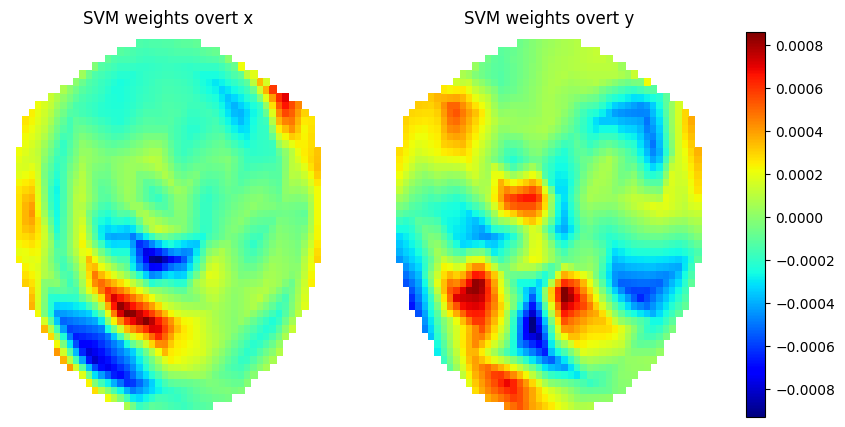

In [72]:
# test NOT FOR FINAL DOC
def func1(d1,d2):
    return d1

def func2(d1,d2):
    return d2

def plotDecisionBoundary(ax, data_x, data_y, title, fname, dfunc):
    xi = np.linspace(min(BCIsensor_xy[:,0]),max(BCIsensor_xy[:,0]))
    yi = np.linspace(min(BCIsensor_xy[:,1]),max(BCIsensor_xy[:,1]))
    gridx,gridy = np.meshgrid(xi,yi)
    d = dfunc(data_x,data_y)
    grid = griddata((BCIsensor_xy[:,0], BCIsensor_xy[:,1]), d, (gridx,gridy), method='linear')
    c = ax.pcolor(grid, cmap='jet')
    ax.axis('off')
    ax.set_title(title)
    return c

def svmWeights(data, title, reg=0.001):
    svm = SVC(kernel='linear', C=reg).fit(data[:,:-1],data[:,-1])

    svm_coef_x = svm.coef_[0,np.arange(0,svm.coef_.shape[1],2)]
    svm_coef_y = svm.coef_[0,np.arange(1,svm.coef_.shape[1],2)]
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    plotDecisionBoundary(ax[0], svm_coef_x,svm_coef_y, f"{title} x","",func1)
    c=plotDecisionBoundary(ax[1], svm_coef_x,svm_coef_y,f"{title} y","",func2)
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    plt.show()

svmWeights(img_combined, "SVM weights imaginary")
svmWeights(overt_combined, "SVM weights overt")

        

In [452]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

testSize = 40
runs = 6
# regs = np.logspace(-6, 4, 11)
regs = [0.01,1,10,10000]

def print_df(df):
    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    tab = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
    tab.auto_set_column_width(col=list(range(len(df.columns))))
    fig.tight_layout()

    plt.show()

def plot_brainMag_weights(weights):
    weights = weights.flatten()
    weight_sort = np.argsort(np.abs(weights)).flatten()
    top_6_x = weight_sort[-6:]
    other_x = weight_sort[:-6]

    top_6_weights = weights[top_6_x]
    other_weights = weights[other_x]
    # print(weights.shape)
    top6_df = pd.DataFrame({"channel_idx":top_6_x, "channel_weight":top_6_weights})
    print_df(top6_df)

    fig,ax = plt.subplots(1,3,figsize=(15,5))
    ax[0].stem(other_x,other_weights, label="non-dominant")
    ax[0].stem(top_6_x, top_6_weights ,label='dominant', linefmt='orange')
    ax[0].set_title(f'SVM weights')
    ax[0].set_xlabel("channel_idx")
    ax[0].set_ylabel("weight")

    ax[0].legend()
    
    weights_x = weights[np.arange(0,weights.shape[0],2)]
    weights_y = weights[np.arange(1,weights.shape[0],2)]    
    plotDecisionBoundary(ax[1], weights_x,weights_y, f"SVM Weights x","",func1)
    c=plotDecisionBoundary(ax[2], weights_x,weights_y,f"SVM Weights y","",func2)
    cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    cbar.ax.yaxis.set_ticks_position('right')
    plt.show()

def two_level_cv(data_c1, data_c0, kernel):
    results = {}
    for runidx in range(runs):
        results[f"run{runidx}"] = {}

        train_c1, test_c1, train_c0, test_c0 = train_test_split(data_c1, data_c0, test_size=1/6)
        train_c1, f1_c1, train_c0, f1_c0 = train_test_split(train_c1, train_c0, test_size=1/5)
        train_c1, f2_c1, train_c0, f2_c0 = train_test_split(train_c1, train_c0, test_size=1/4)
        train_c1, f3_c1, train_c0, f3_c0 = train_test_split(train_c1, train_c0, test_size=1/3)
        f5_c1, f4_c1, f5_c0, f4_c0 = train_test_split(train_c1, train_c0, test_size=1/2)

        test_set = np.vstack((test_c1, test_c0))
        folds = [np.vstack((f1_c1,f1_c0)),np.vstack((f2_c1,f2_c0)),np.vstack((f3_c1,f3_c0)),np.vstack((f4_c1,f4_c0)),np.vstack((f5_c1,f5_c0))]
        for i in range(5):
            cv_test = folds[i]
            cv_train = np.vstack(folds[:i]+folds[i+1:])
            cv_results = []
            for j in regs:
                model = SVC(kernel=kernel, C=j).fit(cv_train[:,:-1],cv_train[:,-1])
                score = model.score(cv_test[:,:-1], cv_test[:,-1])
                cv_results.append((score,j,model))
            best = max(cv_results, key=lambda x: x[0])
            results[f"run{runidx}"] = {"score": best[0], "reg": best[1], "model": best[2]}
            # if i == 0 and runidx == 0:
            #     plot_brainMag_weights(best[2].coef_)
        
        best_model = results[f"run{runidx}"]['model']
        results[f"run{runidx}"]['test_result'] = best_model.score(test_set[:,:-1], test_set[:,-1])
        results[f"run{runidx}"]['decision_stats'] = best_model.decision_function(test_set[:,:-1])
        results[f"run{runidx}"]['decision_labels'] =  test_set[:,-1]
        results[f"run{runidx}"]['support_vectors'] =  best_model.support_vectors_.shape[0]

    return results


In [14]:
img_c1 = np.hstack((feaSubEImg_1.T, np.ones((feaSubEImg_1.T.shape[0],1))))
img_c0 = np.hstack((feaSubEImg_2.T, np.zeros((feaSubEImg_2.T.shape[0],1))))
overt_c1 = np.hstack((feaSubEOvert_1.T, np.ones((feaSubEOvert_1.T.shape[0],1))))
overt_c0 = np.hstack((feaSubEOvert_2.T, np.zeros((feaSubEOvert_2.T.shape[0],1))))

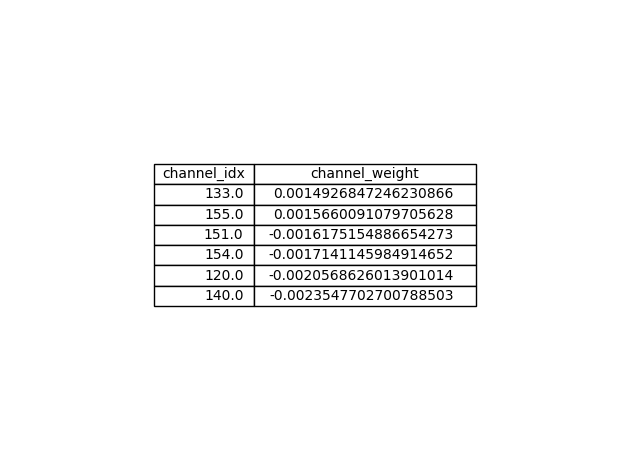

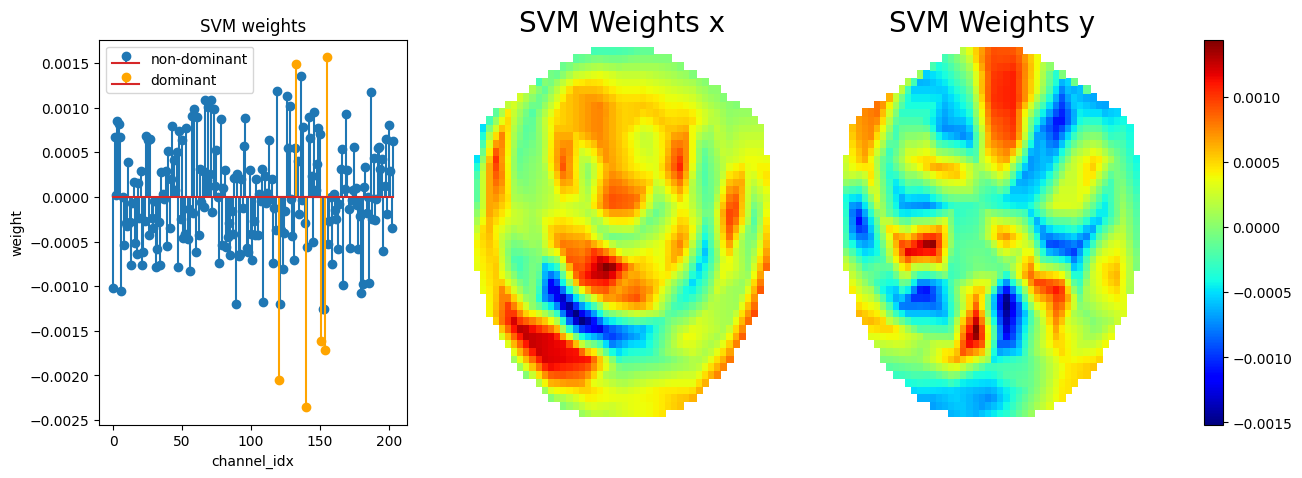

,run0,run1,run2,run3,run4,run5
score,0.775,0.95,0.95,0.875,0.825,0.925
reg,0.01,0.01,0.01,0.01,0.01,0.01
model,"SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')"
test_result,0.9,0.9,0.875,0.825,0.9,0.875
decision_stats,"[2.309450587840019, 3.1440323773144594, 1.2662...","[2.8197774316767665, 3.6902777914246503, 4.364...","[0.013464523844182175, 8.442446666287054, 1.74...","[1.8536581585013303, -2.0654069409820432, -1.1...","[1.5010655667670176, 3.7568643962397346, 1.453...","[0.795754340016293, 2.81235321778952, 3.997627..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,42,41,43,44,38,44


In [268]:
img_img = two_level_cv(img_c1,img_c0, kernel='linear')
img_img_df = pd.DataFrame.from_dict(img_img)
img_img_df

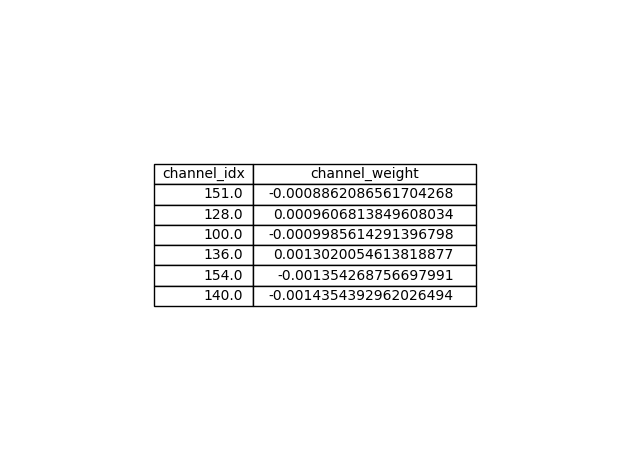

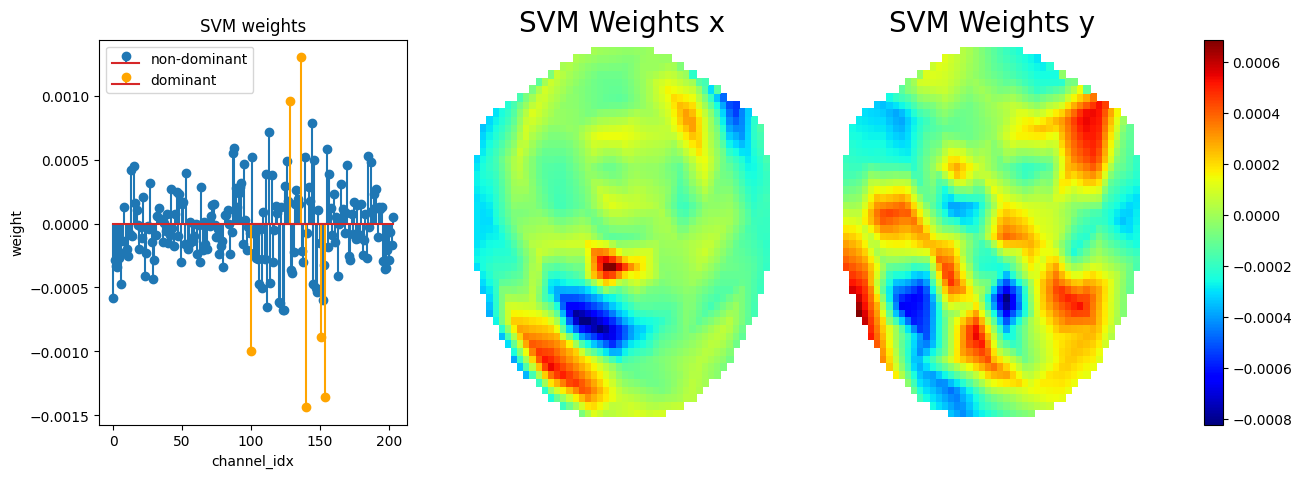

,run0,run1,run2,run3,run4,run5
score,0.925,1.0,1.0,1.0,0.925,0.975
reg,0.01,0.01,0.01,0.01,0.01,0.01
model,"SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')"
test_result,1.0,0.95,1.0,0.975,0.925,0.975
decision_stats,"[1.09941710671907, 4.188025835151572, 1.317248...","[2.565438662060904, 3.9062535069425475, 1.5090...","[1.5219463314243453, 3.238561025015148, 2.8396...","[0.3940750546746379, 1.3248369428643054, 1.539...","[2.130842750037533, 0.2525491319458869, 0.4488...","[1.408148556391406, 3.8564389914104837, 1.4291..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,32,33,36,33,26,36


In [269]:
overt_overt = two_level_cv(overt_c1,overt_c0, kernel='linear')
overt_overt_df = pd.DataFrame.from_dict(overt_overt)
overt_overt_df

In [468]:
def calcPdPfa(data):
    h1s = data[data[:,1] == 1].shape[0]
    h0s = data[data[:,1] == 0].shape[0]
    currh1 = h1s
    currh0 = h0s

    pd = [1]
    pfa = [1]
    if h0s == 0:
        pfa.append(0)
        pd.append(1)
    if h1s == 0:
        pfa.append(1)
        pd.append(0) 
    for i in data:
        if i[1] == 1:
            currh1 -= 1
        elif i[1] == 0:
            currh0 -= 1
        pfa.append(0 if h0s == 0 else currh0/h0s)
        pd.append(0 if h1s == 0 else currh1/h1s)
    pd.append(0)
    pfa.append(0)
    return pd,pfa  


def plotROC_weights(data, weights, title):
    
    tpr, fpr = calcPdPfa(data)
    auc = metrics.auc(fpr, tpr)
    weight_sort = np.argsort(np.abs(weights), axis=0, )
    top_6_x = weight_sort[-6:].flatten()
    other_x = weight_sort[:-6].flatten()
    top_6_weights = weights[top_6_x].flatten()
    other_weights = weights[other_x].flatten()
    top6_df = pd.DataFrame({"channel_idx":top_6_x, "channel_weight":top_6_weights})
    # print(top6_df)
    
    # fig,ax = plt.subplots(1,2,figsize=(10,5))
    # ax[1].stem(other_x,other_weights, label="non-dominant")
    # ax[1].stem(top_6_x, top_6_weights ,label='dominant', linefmt='orange')
    # ax[1].set_title(f'{title} SVM weights')
    # ax[1].legend()

    # ax[0].plot(fpr,tpr)
    # ax[0].set_title(f'{title} ROC detecting c1 auc:{round(auc,5)}')
    # ax[0].plot([0, 1], [0, 1],'r--')

    return top6_df

def plotROC(df, title):
    fig,ax = plt.subplots()
    total_top_6_df = pd.DataFrame()
    first = True
    avg_tpr = None
    avg_fpr = None
    avg_accuracy = []
    for i, run in enumerate(df.values()):
        decision_stats = run['decision_stats']
        labels = run['decision_labels']
        weights = run['model'].coef_.T
        data = np.column_stack((decision_stats,labels))
        data = data[decision_stats.argsort()]

        tpr, fpr = calcPdPfa(data)
        if first:
            avg_tpr = np.array(tpr)
            avg_fpr = np.array(fpr)
            first = False
        else:
            avg_tpr = np.vstack((avg_tpr, np.array(tpr)))
            avg_fpr = np.vstack((avg_fpr, np.array(fpr)))
        avg_accuracy.append(run['score'])
        auc = metrics.auc(fpr, tpr)
        ax.plot(fpr,tpr, label=f"auc:{round(auc,5)} accuracy: {run['score']}")

        top6_df = plotROC_weights(data, weights, title)
        # print_df(top6_df)

        total_top_6_df = pd.concat([total_top_6_df, top6_df])
        
    avg_tpr = np.average(avg_tpr, axis=0)
    avg_fpr = np.average(avg_fpr, axis=0)
    avg_accuracy = np.average(avg_accuracy)

    ax.plot(avg_fpr,avg_tpr, 'b--', label=f"Total auc:{round(metrics.auc(avg_fpr, avg_tpr),5)} accuracy: {round(avg_accuracy,3)}")


    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title(f'ROC {title}')
    ax.set_ylabel('PD')
    ax.set_xlabel('PFA')

    plt.legend()
    plt.show()
    agg = total_top_6_df.groupby('channel_idx').size().reset_index(name="count").sort_values('count', ascending=False)
    print(agg)





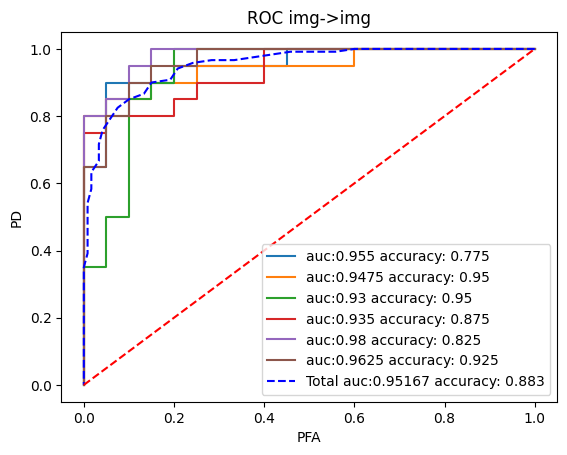

    channel_idx  count
5           140      6
9           154      6
4           136      5
6           151      5
0           120      3
8           153      3
1           126      2
10          155      2
2           128      1
3           133      1
7           152      1
11          196      1


In [469]:
plotROC(img_img, "img->img")

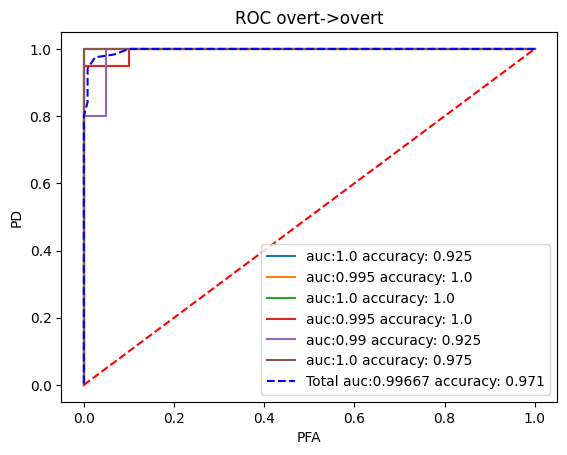

    channel_idx  count
2           100      6
7           140      6
9           154      6
6           136      5
5           128      4
1            49      2
4           120      2
10          155      2
0             4      1
3           108      1
8           151      1


In [470]:
plotROC(overt_overt, "overt->overt")

In [479]:
# best reg param is 1e-6

def img_overt_pred(ax, train, test, title, kernel='linear'):

    x_train, x_test, y_train, y_test = train_test_split(train[:,:-1],train[:,-1])
    cv_results = []
    for j in regs:
        svm = SVC(kernel=kernel,C=j).fit(x_train,y_train)
        accuracy = svm.score(x_test,y_test)
        cv_results.append((accuracy,j,svm))
    best = max(cv_results, key=lambda x: x[0])

    best_model = best[2]

    accuracy = best_model.score(test[:,:-1], test[:,-1])
    decision_stats = best_model.decision_function(test[:,:-1])
    labels = test[:,-1]
    
    data = np.column_stack((decision_stats,labels))
    data = data[decision_stats.argsort()]
    print(title)
    print('best reg:',best[1])
    print(best_model.support_vectors_.shape)

    tpr, fpr = calcPdPfa(data)
    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr,tpr, label=f"{title} auc:{round(auc,5)} accuracy: {round(accuracy,3)}")

    return accuracy, best_model, best[1]


img->overt linear
best reg: 0.01
(46, 204)
overt->img linear
best reg: 0.01
(33, 204)


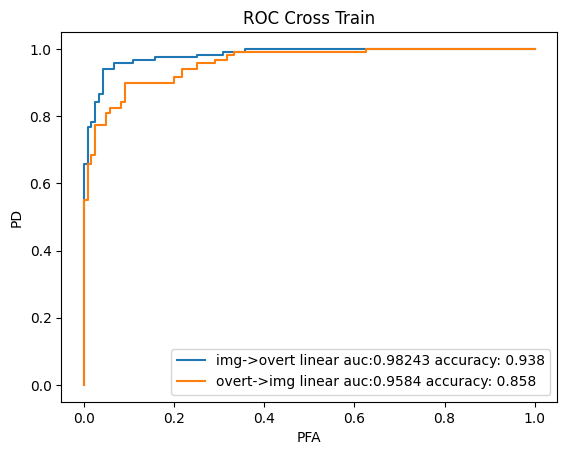

In [480]:
fig,ax = plt.subplots()
img_overt_pred(ax, img_combined, overt_combined, f"img->overt {kernels[0]}", kernel=kernels[0])
img_overt_pred(ax, overt_combined, img_combined, f"overt->img {kernels[0]}", kernel=kernels[0])
plt.legend()
plt.title(f'ROC Cross Train')
plt.ylabel('PD')
plt.xlabel('PFA')

plt.show()

img->overt linear
best reg: 0.01
(45, 204)
overt->img linear
best reg: 0.01
(36, 204)
img->overt rbf
best reg: 10
(121, 204)
overt->img rbf
best reg: 1
(107, 204)
img->overt sigmoid
best reg: 10
(62, 204)
overt->img sigmoid
best reg: 1
(78, 204)
img->overt poly
best reg: 10
(130, 204)
overt->img poly
best reg: 10000
(97, 204)


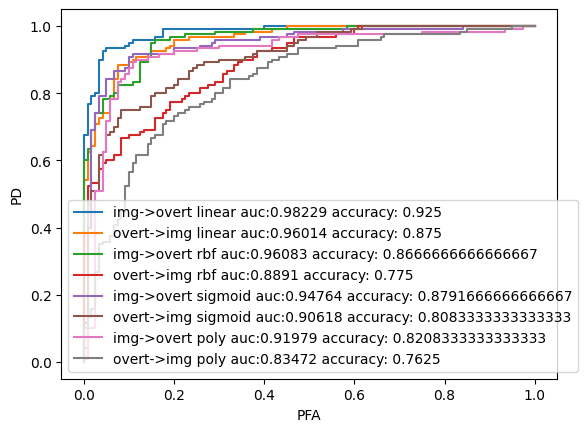

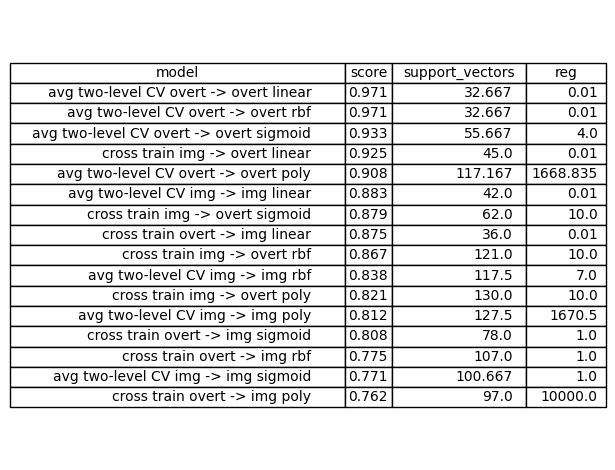

In [476]:
model_comp_df = pd.DataFrame()

img_models = [img_img_df,img_img_rbf_df,img_img_sig_df,img_img_poly_df]
overt_models = [overt_overt_df,overt_overt_rbf_df,overt_overt_sig_df,overt_overt_poly_df]
kernels = ['linear','rbf','sigmoid','poly']


models = []
scores = []
svs = []
reg = []
fig, ax = plt.subplots()

for i in range(len(kernels)):
    models.append(f'avg two-level CV img -> img {kernels[i]}')
    scores.append(round(np.average(img_models[i].T['score']),3))
    svs.append(round(np.average(img_models[i].T['support_vectors']),3))
    reg.append(round(np.average(img_models[i].T['reg']),3))


    models.append(f'avg two-level CV overt -> overt {kernels[i]}')
    scores.append(round(np.average(overt_models[i].T['score']),3))
    svs.append(round(np.average(overt_models[i].T['support_vectors']),3))
    reg.append(round(np.average(overt_models[i].T['reg']),3))

    io_accuracy, io_model, io_reg = img_overt_pred(ax, img_combined, overt_combined, f"img->overt {kernels[i]}", kernel=kernels[i])
    oi_accuracy, oi_model, oi_reg = img_overt_pred(ax, overt_combined, img_combined, f"overt->img {kernels[i]}", kernel=kernels[i])
    
    models.append(f'cross train img -> overt {kernels[i]}')
    scores.append(round(io_accuracy,3))
    svs.append(round(io_model.support_vectors_.shape[0],3))
    reg.append(io_reg)

    models.append(f'cross train overt -> img {kernels[i]}')
    scores.append(round(oi_accuracy,3))
    svs.append(round(oi_model.support_vectors_.shape[0],3))
    reg.append(oi_reg)

plt.legend()
plt.xlabel('PFA')
plt.ylabel('PD')
plt.show()
model_comp_df['model'] = models
model_comp_df['score'] = scores
model_comp_df['support_vectors'] = svs
model_comp_df['reg'] = reg

model_comp_df = model_comp_df.sort_values('score',ascending=False)
print_df(model_comp_df)


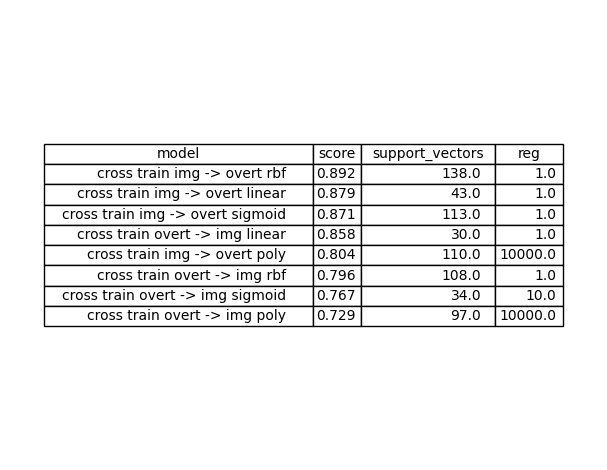

In [421]:
cross_train = model_comp_df[model_comp_df['model'].str.contains('cross')]
print_df(cross_train)

In [299]:
img_img_poly = two_level_cv(img_c1,img_c0, kernel='poly')
img_img_poly_df = pd.DataFrame.from_dict(img_img_poly)
img_img_poly_df

,run0,run1,run2,run3,run4,run5
score,0.8,0.875,0.725,0.825,0.85,0.8
reg,10,1,10000,1,10,1
model,"SVC(C=10, kernel='poly')","SVC(C=1, kernel='poly')","SVC(C=10000, kernel='poly')","SVC(C=1, kernel='poly')","SVC(C=10, kernel='poly')","SVC(C=1, kernel='poly')"
test_result,0.8,0.9,0.575,0.875,0.9,0.75
decision_stats,"[0.4108466089412278, -0.3834592580717288, 0.33...","[0.5953000674692241, 0.1668253395868007, 0.574...","[1.0687761803110247, 1.3196094672069925, 1.897...","[0.2261330531859887, 0.007029610170070533, 1.0...","[-0.3715832334801603, 1.118771943594769, 6.298...","[-0.3732964117396866, 2.4988127920744128, 0.47..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,119,139,101,139,121,146


In [300]:
img_img_rbf = two_level_cv(img_c1,img_c0, kernel='rbf')
img_img_rbf_df = pd.DataFrame.from_dict(img_img_rbf)
img_img_rbf_df

,run0,run1,run2,run3,run4,run5
score,0.9,0.825,0.775,0.825,0.9,0.8
reg,10,1,10,10,1,10
model,SVC(C=10),SVC(C=1),SVC(C=10),SVC(C=10),SVC(C=1),SVC(C=10)
test_result,0.8,0.8,0.775,0.825,0.9,0.85
decision_stats,"[1.3121104164026538, -0.017445050788605695, -0...","[-0.11136443439488203, 0.30547074219769743, 0....","[0.10506623420039865, 0.8211828847475625, -0.1...","[0.547269953667544, -0.10021270640814359, 1.15...","[0.8632304894761702, 0.285360374254747, 0.2663...","[0.8726629628937933, 1.5046010841613873, 0.424..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,114,129,115,110,127,110


In [301]:
img_img_sig = two_level_cv(img_c1,img_c0, kernel='sigmoid')
img_img_sig_df = pd.DataFrame.from_dict(img_img_sig)
img_img_sig_df

,run0,run1,run2,run3,run4,run5
score,0.825,0.725,0.8,0.75,0.8,0.725
reg,1,1,1,1,1,1
model,"SVC(C=1, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')"
test_result,0.9,0.85,0.875,0.875,0.9,0.85
decision_stats,"[1.2430146537434619, 0.21448193891962397, -0.0...","[1.7770108247008092, -0.22132432674082525, 1.8...","[0.8136103824634395, 0.07968758961652811, 2.30...","[-0.9047976673479895, -0.393945313636459, 0.83...","[0.4619793435074514, -0.15633504938679676, 0.2...","[-0.3589286353531671, 0.19308180636694428, 1.2..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,103,102,101,94,102,102


In [302]:
overt_overt_poly = two_level_cv(overt_c1,overt_c0, kernel='poly')
overt_overt_poly_df = pd.DataFrame.from_dict(overt_overt_poly)
overt_overt_poly_df

,run0,run1,run2,run3,run4,run5
score,0.95,0.85,0.975,0.95,0.9,0.825
reg,1,10000,10,1,1,0.01
model,"SVC(C=1, kernel='poly')","SVC(C=10000, kernel='poly')","SVC(C=10, kernel='poly')","SVC(C=1, kernel='poly')","SVC(C=1, kernel='poly')","SVC(C=0.01, kernel='poly')"
test_result,0.825,0.925,0.9,0.85,0.975,0.825
decision_stats,"[0.2596202809000014, 1.506809294400055, -0.221...","[1.5690384961005115, 0.05908233396402457, 0.49...","[7.695204322059811, 1.5218596228319305, 2.2512...","[0.45893418838342526, -0.2181839925944291, 1.1...","[1.383191707963545, 0.5816280713638818, 0.7863...","[0.004800753420111711, 0.022855973839304905, 0..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,120,84,94,119,126,160


In [285]:
overt_overt_rbf = two_level_cv(overt_c1,overt_c0, kernel='rbf')
overt_overt_rbf_df = pd.DataFrame.from_dict(overt_overt_rbf)
overt_overt_rbf_df

,run0,run1,run2,run3,run4,run5
score,0.925,1.0,1.0,1.0,0.925,0.975
reg,0.01,0.01,0.01,0.01,0.01,0.01
model,"SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')","SVC(C=0.01, kernel='linear')"
test_result,1.0,0.95,1.0,0.975,0.925,0.975
decision_stats,"[1.09941710671907, 4.188025835151572, 1.317248...","[2.565438662060904, 3.9062535069425475, 1.5090...","[1.5219463314243453, 3.238561025015148, 2.8396...","[0.3940750546746379, 1.3248369428643054, 1.539...","[2.130842750037533, 0.2525491319458869, 0.4488...","[1.408148556391406, 3.8564389914104837, 1.4291..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,32,33,36,33,26,36


In [303]:
overt_overt_sig = two_level_cv(overt_c1,overt_c0, kernel='sigmoid')
overt_overt_sig_df = pd.DataFrame.from_dict(overt_overt_sig)
overt_overt_sig_df

,run0,run1,run2,run3,run4,run5
score,0.875,1.0,0.925,0.95,0.925,0.925
reg,1,10,1,10,1,1
model,"SVC(C=1, kernel='sigmoid')","SVC(C=10, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')","SVC(C=10, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')","SVC(C=1, kernel='sigmoid')"
test_result,0.925,0.9,0.85,0.85,0.8,0.925
decision_stats,"[1.7126326501323985, 1.3664027176011755, 0.946...","[10.15232101644382, 6.591406314261221, 2.97128...","[1.1978083188495436, 3.3040493564776203, -0.09...","[3.4590407003616406, 8.842518591084524, 2.2343...","[1.6510580318659402, 1.2750315594358237, -0.41...","[0.9119146686273796, 0.7116687837634996, 0.113..."
decision_labels,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
support_vectors,70,38,62,33,65,66


[0.925, 0.95, 0.975, 0.975, 1.0, 1.0]
[0.925, 0.95, 0.975, 0.975, 1.0, 1.0]
[0.8, 0.85, 0.85, 0.9, 0.925, 0.925]
[0.825, 0.825, 0.85, 0.9, 0.925, 0.975]


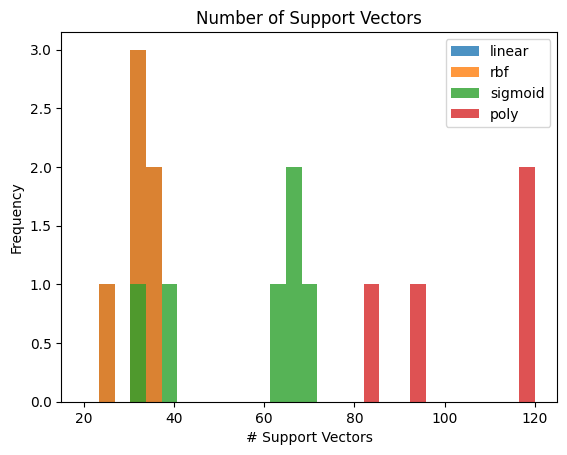

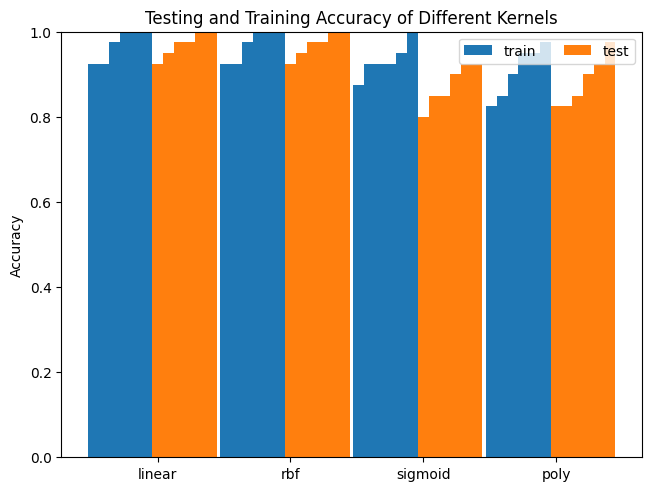

In [396]:
img_models = [img_img_df,img_img_rbf_df,img_img_sig_df,img_img_poly_df]
overt_models = [overt_overt_df,overt_overt_rbf_df,overt_overt_sig_df,overt_overt_poly_df]
kernels = ['linear','rbf','sigmoid','poly']

results = {'train':[], 'test':[]}
bins = np.linspace(20, 120, 30)

# for idx, i in enumerate(img_models):
for idx, i in enumerate(overt_models):

    training_res = sorted(i.T['score'])
    support_vectors = i.T['support_vectors']
    test_res = sorted(i.T['test_result'])
    regs = i.T['reg']
    print(test_res)
    results['train'] += training_res
    results['test'] += test_res

    plt.hist(support_vectors, label=kernels[idx], bins=bins,alpha=0.8)
plt.title("Number of Support Vectors")
plt.xlabel("# Support Vectors")
plt.ylabel("Frequency")
plt.legend()
plt.show()


width = 3  # the width of the bars
spacer = 1
n = 6
fig, ax = plt.subplots(layout='constrained')
x = np.arange(0,n*width, width)
for idx,(label, lst) in enumerate(results.items()):

    allx = x + n*width*idx
    curr = n*width*idx + n*width*(2)  + spacer

    for i in range(1,len(kernels)):
        allx = np.concatenate((allx, x+curr))
        curr += n*width*2  + spacer

    rects = ax.bar(allx, lst, width, label=label)
    # ax.bar_label(rects, padding=3)




ax.set_ylabel('Accuracy')
ax.set_title('Testing and Training Accuracy of Different Kernels')
ax.set_xticks(n*width + np.arange(len(kernels))*12*width + np.arange(len(kernels))*spacer, kernels)
ax.set_ylim(0, 1)
ax.legend(loc='upper right', ncols=3)

plt.show()




In [274]:
# from sklearn.inspection import DecisionBoundaryDisplay

# cov = [[0.25, 0], [0, 0.25]]
# n = 20
# x, y = np.random.multivariate_normal((2,4), cov,n).T
# plt.scatter(x,y,label='hypothetical left movement')
# x2, y2 = np.random.multivariate_normal((2, 1), cov,n).T
# plt.scatter(x2,y2,label='hypothetical right movement')
# features = np.column_stack([np.concatenate((x,x2)),np.concatenate((y,y2))])
# labels = np.concatenate((np.ones(n),np.zeros(n)))
# a= SVC(kernel='linear').fit(features,labels)
# ax = plt.gca()
# DecisionBoundaryDisplay.from_estimator(
#     a,
#     features,
#     plot_method="contour",
#     colors="k",
#     levels=[-1, 0, 1],
#     alpha=0.5,
#     linestyles=["--"],
#     ax=ax,
# )

# plt.legend()
